In [ ]:
## Introduction to Self Organizing Maps (SOMs)

Self Organizing Maps (SOMs) are a type of artificial neural network used for unsupervised learning. They are particularly useful for visualizing high-dimensional data by projecting it onto a lower-dimensional (usually 2D) grid. SOMs are used in various applications such as clustering, data visualization, and anomaly detection.

In this notebook, we will use SOMs to identify potential frauds in a dataset of credit card applications.

SyntaxError: invalid decimal literal (46800023.py, line 3)

#Self Organizing Map

##Install MiniSom Package

In [2]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=0685aae91bdd4e68bbbcad461a10da2a6bbea7997318d52f271c85e93b102e0a
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [4]:
!pip install tqdm

### Importing the libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltz

## Importing the dataset

In [12]:
import pandas as pd
# Ensure the correct file name and path
dataset = pd.read_csv('Credit_Card_Applications_Datasets.csv')
# Or specify the complete file path if it's in a different directory.
# For example:
# dataset = pd.read_csv('/path/to/your/file/Credit_Card_Applications_Datasets.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [14]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


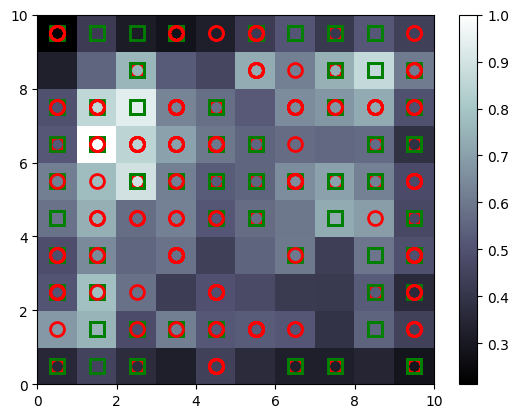

In [15]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [16]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraud Clients

In [17]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15720644
15746258
15700511
15761158
15666166
15605872
15665087
